In [79]:
!git clone https://github.com/ngonza27/self-driving-car-data

fatal: destination path 'self-driving-car-data' already exists and is not an empty directory.


In [80]:
!ls self-driving-car-data/

driving_log.csv  IMG


In [81]:
!pip3 install imgaug

In [82]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import random
import cv2
import ntpath
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa # library for iage augmentation 
np.random.seed(0)

In [83]:
data_dir = "self-driving-car-data/"
columns = ["center", "left", "right", "steering", "throttle", "reverse", "speed"]
data = pd.read_csv(os.path.join(data_dir + "driving_log.csv"), names = columns)
pd.set_option("display.max_colwidth", -1)
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


center  \
0  /home/ngonza27/Documents/simulator/simulator-linux/Data/IMG/center_2022_04_20_10_09_56_509.jpg   
1  /home/ngonza27/Documents/simulator/simulator-linux/Data/IMG/center_2022_04_20_10_09_56_624.jpg   
2  /home/ngonza27/Documents/simulator/simulator-linux/Data/IMG/center_2022_04_20_10_09_56_740.jpg   
3  /home/ngonza27/Documents/simulator/simulator-linux/Data/IMG/center_2022_04_20_10_09_56_845.jpg   
4  /home/ngonza27/Documents/simulator/simulator-linux/Data/IMG/center_2022_04_20_10_09_56_959.jpg   

                                                                                            left  \
0   /home/ngonza27/Documents/simulator/simulator-linux/Data/IMG/left_2022_04_20_10_09_56_509.jpg   
1   /home/ngonza27/Documents/simulator/simulator-linux/Data/IMG/left_2022_04_20_10_09_56_624.jpg   
2   /home/ngonza27/Documents/simulator/simulator-linux/Data/IMG/left_2022_04_20_10_09_56_740.jpg   
3   /home/ngonza27/Documents/simulator/simulator-linux/Data/IMG/left_2022_04_20_10_09_56_845.jpg   
4   /home/ngonza27/Documents/simulator/simulator-linux/Data/IMG/left_2022_04_20_10_09_56_959.jpg   

                                                                                            right  \
0   /home/ngonza27/Documents/simulator/simulator-linux/Data/IMG/right_2022_04_20_10_09_56_509.jpg   
1   /home/ngonza27/Documents/simulator/simulator-linux/Data/IMG/right_2022_04_20_10_09_56_624.jpg   
2   /home/ngonza27/Documents/simulator/simulator-linux/Data/IMG/right_2022_04_20_10_09_56_740.jpg   
3   /home/ngonza27/Documents/simulator/simulator-linux/Data/IMG/right_2022_04_20_10_09_56_845.jpg   
4   /home/ngonza27/Documents/simulator/simulator-linux/Data/IMG/right_2022_04_20_10_09_56_959.jpg   

   steering  throttle  reverse     speed  
0  0.0       0.0       0.0      0.000080  
1  0.0       0.0       0.0      0.000078  
2  0.0       0.0       0.0      0.000078  
3  0.0       0.0       0.0      0.000078  
4  0.0       0.0       0.0      0.000081

In [84]:
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail

data['center'] = data['center'].apply(path_leaf)
data['left']   = data['left'].apply(path_leaf)
data['right']  = data['right'].apply(path_leaf)
data.head()

center                              left  \
0  center_2022_04_20_10_09_56_509.jpg  left_2022_04_20_10_09_56_509.jpg   
1  center_2022_04_20_10_09_56_624.jpg  left_2022_04_20_10_09_56_624.jpg   
2  center_2022_04_20_10_09_56_740.jpg  left_2022_04_20_10_09_56_740.jpg   
3  center_2022_04_20_10_09_56_845.jpg  left_2022_04_20_10_09_56_845.jpg   
4  center_2022_04_20_10_09_56_959.jpg  left_2022_04_20_10_09_56_959.jpg   

                               right  steering  throttle  reverse     speed  
0  right_2022_04_20_10_09_56_509.jpg  0.0       0.0       0.0      0.000080  
1  right_2022_04_20_10_09_56_624.jpg  0.0       0.0       0.0      0.000078  
2  right_2022_04_20_10_09_56_740.jpg  0.0       0.0       0.0      0.000078  
3  right_2022_04_20_10_09_56_845.jpg  0.0       0.0       0.0      0.000078  
4  right_2022_04_20_10_09_56_959.jpg  0.0       0.0       0.0      0.000081

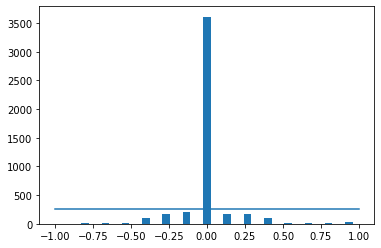

In [85]:
num_bins = 15
samples_per_bin = 250
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1] + bins[1:]) / 2 # Normalizing bins
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

Ammount of sample data: 4664
Removed items:  3362
Remaining data size: 1302


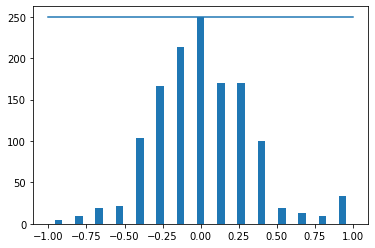

In [86]:
print("Ammount of sample data:", len(data))
removed_samples = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if(data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]):
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  removed_samples.extend(list_)

print("Removed items: ", len(removed_samples))
data.drop(data.index[removed_samples], inplace=True)
print("Remaining data size:", len(data))

hist, _ = np.histogram(data['steering'], num_bins)
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [87]:
from textwrap import indent
print(data.iloc[1])
def load_img_steering(data_dir, df):
  image_paths = []
  steering_angles = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_paths.append(os.path.join(data_dir, center.strip()))
    steering_angles.append(indexed_data[3])
  image_paths = np.asarray(image_paths)
  steering_angles = np.asarray(steering_angles)
  return image_paths, steering_angles

image_paths, steering_angles = load_img_steering(data_dir + "IMG", data)


center      center_2022_04_20_10_09_58_875.jpg
left        left_2022_04_20_10_09_58_875.jpg  
right       right_2022_04_20_10_09_58_875.jpg 
steering   -0.179103                          
throttle    1.0                               
reverse     0.0                               
speed       5.297716                          
Name: 21, dtype: object


In [88]:
#                                                               Data(image), Labels(steering angle)
X_train, X_validation, y_train, y_validation = train_test_split(image_paths, steering_angles, test_size=0.2, random_state=5)
print("Training samples size: {}\nValidation samples size: {}".format(len(X_train), len(X_validation)))

Training samples size: 1041
Validation samples size: 261


Text(0.5, 1.0, 'Validation set')

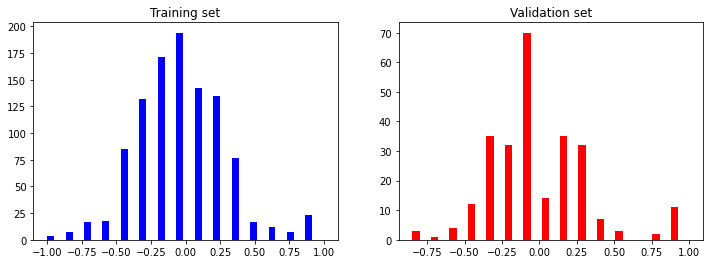

In [89]:
fig, axis = plt.subplots(1, 2,  figsize=(12, 4))

axis[0].hist(y_train, bins=num_bins, width=0.05, color="b")
axis[0].set_title("Training set")
axis[1].hist(y_validation, bins=num_bins, width=0.05, color="r")
axis[1].set_title("Validation set")

In [90]:
# Augmentation techniques
def zoom(image):
  zoom = iaa.Affine(scale=(1, 1.3))
  return zoom.augment_image(image)

def pan(image):
  pan = iaa.Affine(translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)})
  return pan.augment_image(image)

def img_random_brightness(image):
  brightness = iaa.Multiply((0.2, 1.2))
  return brightness.augment_image(image)

def img_random_flip(image, steering_angle):
  image = cv2.flip(image, 1)
  steering_angle = -steering_angle
  return image, steering_angle

Text(0.5, 1.0, 'Flip image')

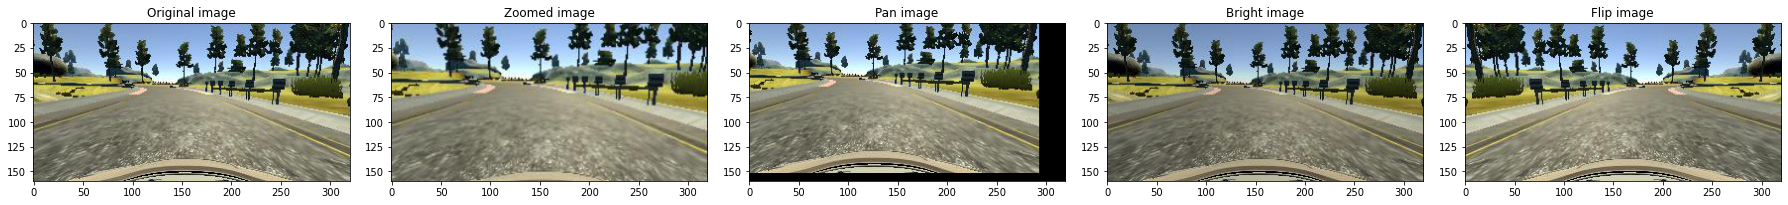

In [91]:
image_index = 123
image = image_paths[image_index]
steering_angle = steering_angles[image_index]

# Image variations
original_image = mpimg.imread(image)
zoom_image = zoom(original_image)
pan_image = pan(original_image)
bright_image = img_random_brightness(original_image)
flip_image, flip_steering_angle = img_random_flip(original_image, steering_angle)

# Plotting the image
fig, axis = plt.subplots(1, 5, figsize=(25, 25))
fig.tight_layout()
axis[0].imshow(original_image)
axis[0].set_title("Original image")

axis[1].imshow(zoom_image)
axis[1].set_title("Zoomed image")

axis[2].imshow(pan_image)
axis[2].set_title("Pan image")

axis[3].imshow(bright_image)
axis[3].set_title("Bright image")

axis[4].imshow(flip_image)
axis[4].set_title("Flip image")


In [92]:
def random_augment(image, steering_angle):
  image = mpimg.imread(image)
  if np.random.rand() < 0.5:
    image = pan(image)
  if np.random.rand() < 0.5:
    image = zoom(image)
  if np.random.rand() < 0.5:
    image = img_random_brightness(image)
  if np.random.rand() < 0.5:
    image, steering_angle = img_random_flip(image, steering_angle)
  
  return image, steering_angle

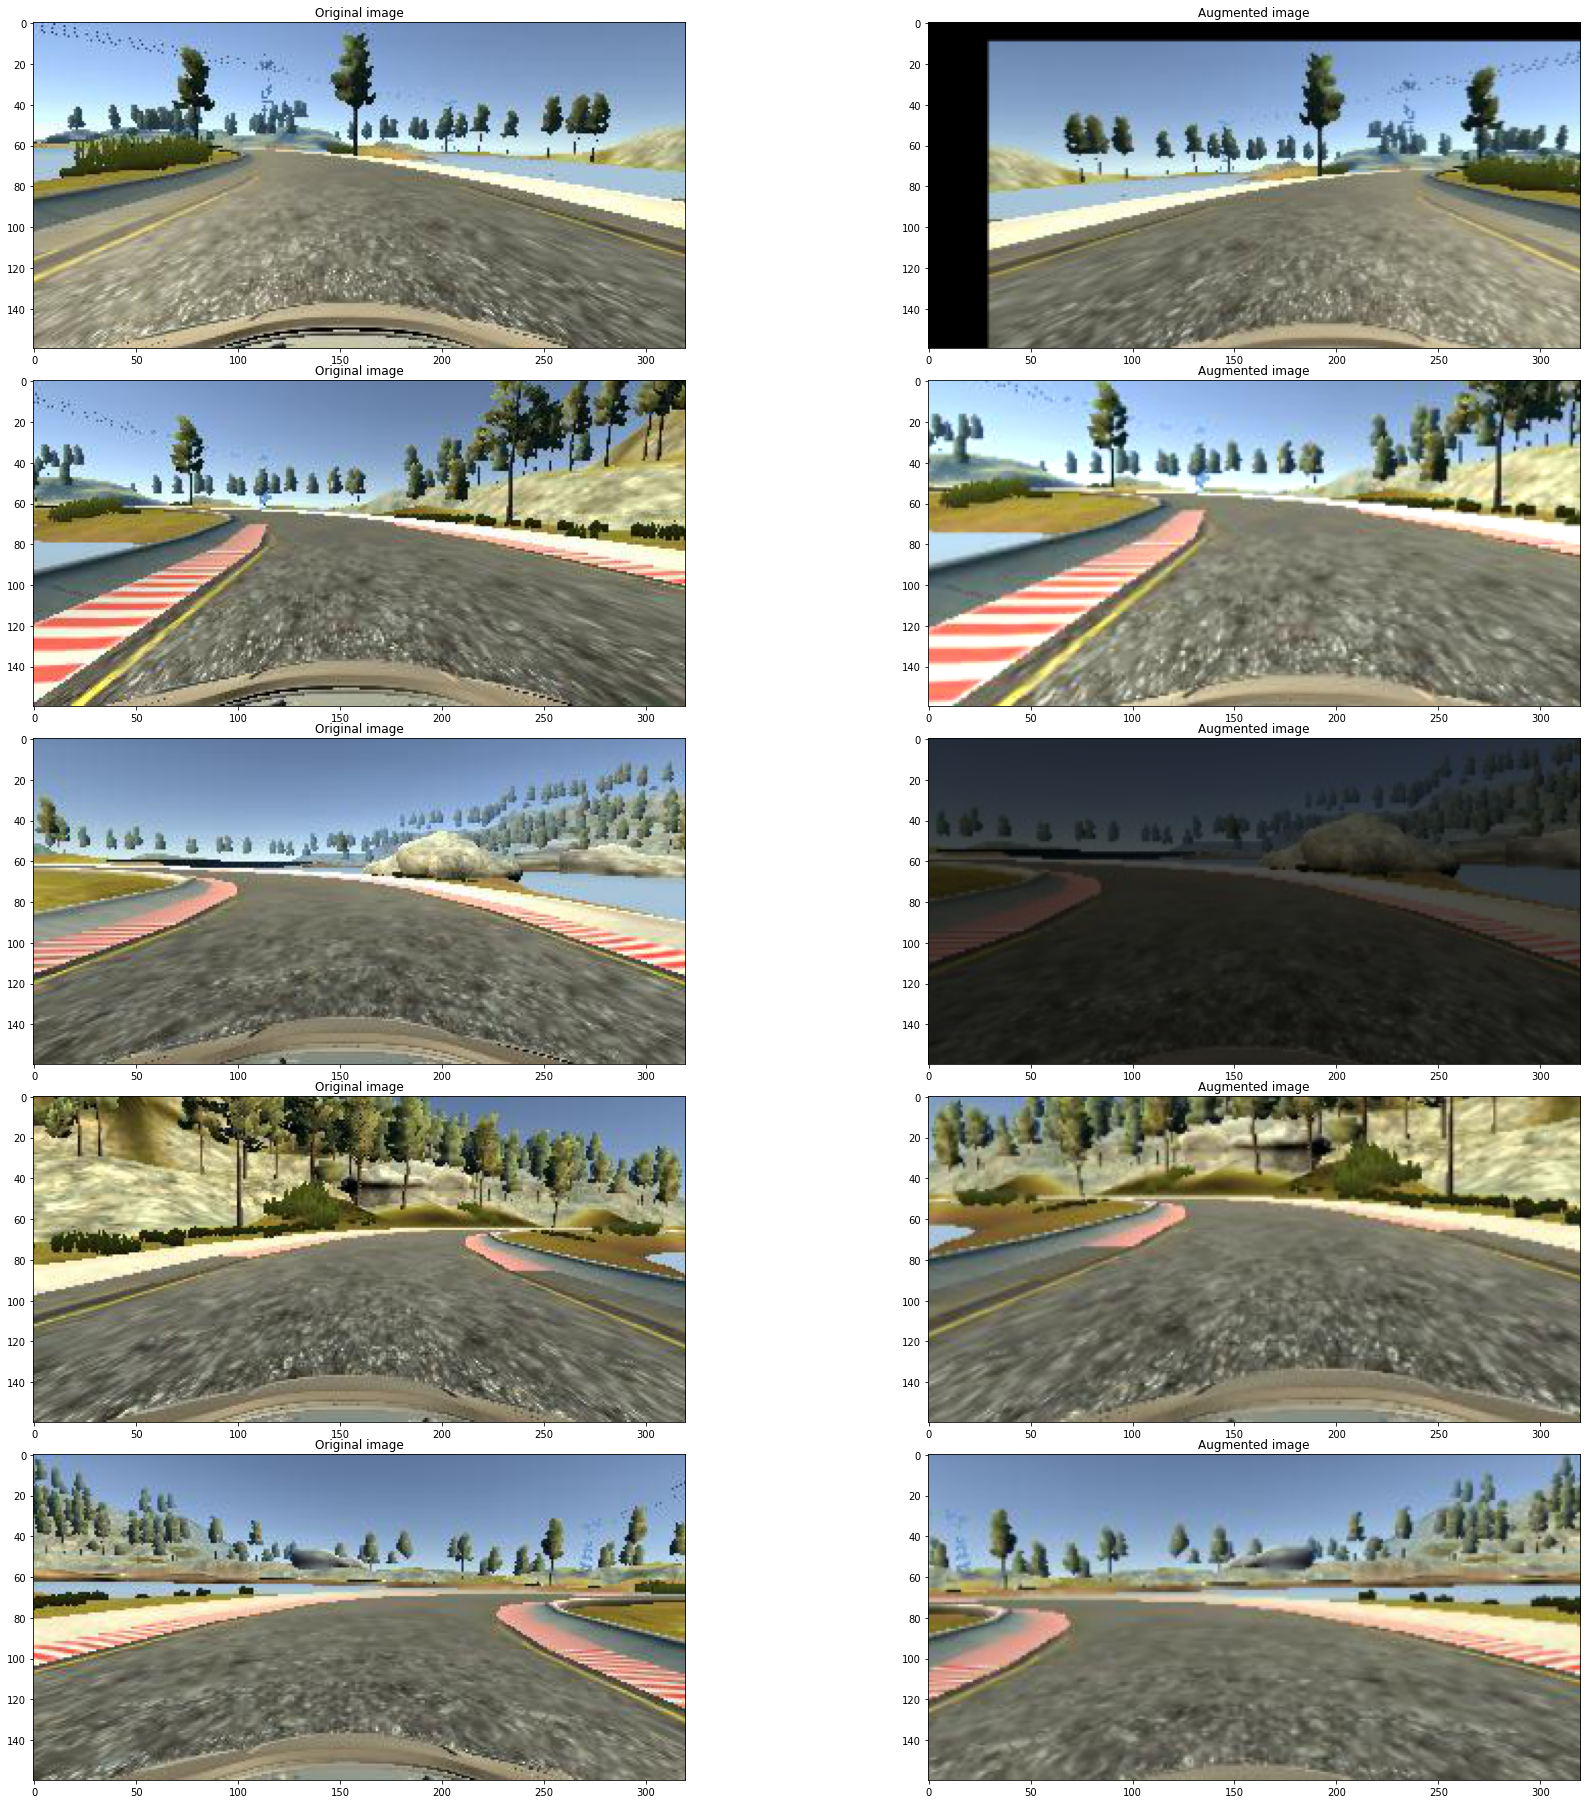

In [93]:
ncol = 2
nrow = 5

fig, axis = plt.subplots(nrow, ncol, figsize=(25, 25))
fig.tight_layout()

for i in range(nrow):
  rand_num = random.randint(0, len(image_paths) - 1)
  random_image = image_paths[rand_num]
  random_steering = steering_angles[rand_num]

  original_image = mpimg.imread(random_image)
  augmented_image, steering = random_augment(random_image, random_steering)

  axis[i][0].imshow(original_image)
  axis[i][0].set_title("Original image")

  axis[i][1].imshow(augmented_image)
  axis[i][1].set_title("Augmented image")

In [94]:
def img_preprocess(img):
  img = img[60:135,: , :]
  img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
  img = cv2.GaussianBlur(img, (3, 3), 0)
  img = cv2.resize(img, (200, 66)) # Resizing to match Nvidia model architecture
  img = img/255
  return img

Text(0.5, 1.0, 'Preprocessed image')

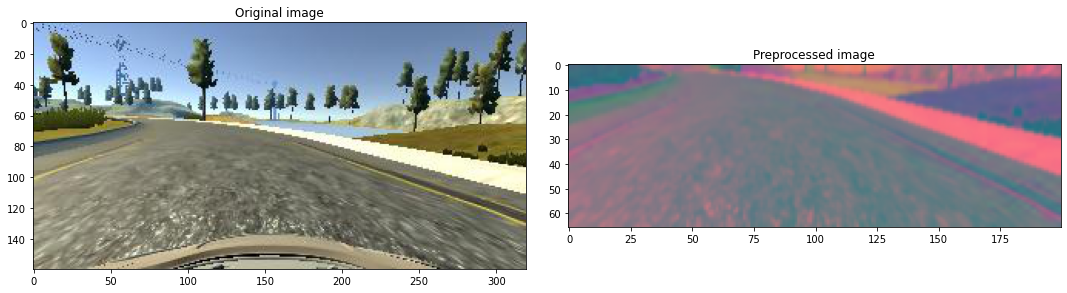

In [95]:
image_index = 100
image = image_paths[image_index]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(original_image)

fig, axis = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axis[0].imshow(original_image)
axis[0].set_title("Original image")
axis[1].imshow(preprocessed_image)
axis[1].set_title("Preprocessed image")

In [96]:
# Python generator function
def batch_generator(image_paths, steering_ang, batch_size, isTraining):
  while True:
    batch_img = []
    batch_steering = []
    for i in range(batch_size):
      random_index = random.randint(0, len(image_paths) - 1)
      
      if isTraining:
        image, steering = random_augment(image_paths[random_index], steering_angles[random_index])
      else:
        image = mpimg.imread(image_paths[random_index])
        steering = steering_angles[random_index]

      image = img_preprocess(image)
      batch_img.append(image)
      batch_steering.append(steering)
    
    yield (np.asarray(batch_img), np.asarray(batch_steering))

Text(0.5, 1.0, 'Validation image')

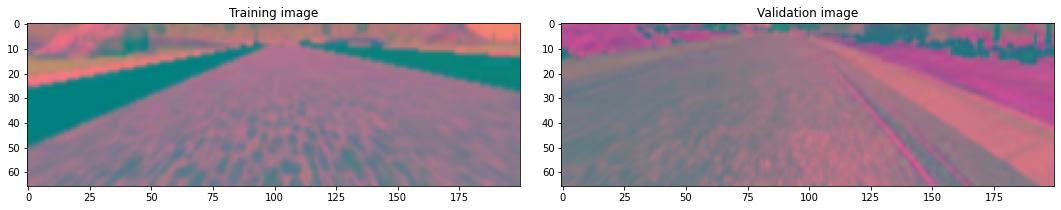

In [97]:
x_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1))
x_validation_gen, y_validation_gen = next(batch_generator(X_validation, y_validation, 1, 0))

fig, axis = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axis[0].imshow(x_train_gen[0])
axis[0].set_title("Training image")

axis[1].imshow(x_validation_gen[0])
axis[1].set_title("Validation image")

In [98]:
def nvidia_model():
  model = Sequential()
  
  model.add(Convolution2D(24, kernel_size=(5,5), strides=(2,2), input_shape=(66,200,3),activation='elu'))
  
  model.add(Convolution2D(36, kernel_size=(5,5), strides=(2,2), activation='elu'))
  model.add(Convolution2D(48, kernel_size=(5,5), strides=(2,2), activation='elu'))
  # strides remove due to the small size of the images, no need to skip pixels
  model.add(Convolution2D(64, kernel_size=(3,3), activation='elu'))
  model.add(Convolution2D(64, kernel_size=(3,3), activation='elu'))
  
  model.add(Dropout(0.55))
  
  model.add(Flatten())
  model.add(Dense(100, activation='elu'))
  # model.add(Dropout(0.5))
  model.add(Dense(50, activation='elu'))
  # model.add(Dropout(0.5))
  model.add(Dense(10, activation ='elu'))
  # model.add(Dropout(0.5))

  model.add(Dense(1))
  
  optimizer= Adam(learning_rate=1e-4)
  model.compile(loss='mse', optimizer=optimizer)
  
  return model

In [99]:
model = nvidia_model()
print(model.summary()) 

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 31, 98, 24)        1824      
                                                                 
 conv2d_21 (Conv2D)          (None, 14, 47, 36)        21636     
                                                                 
 conv2d_22 (Conv2D)          (None, 5, 22, 48)         43248     
                                                                 
 conv2d_23 (Conv2D)          (None, 3, 20, 64)         27712     
                                                                 
 conv2d_24 (Conv2D)          (None, 1, 18, 64)         36928     
                                                                 
 dropout_1 (Dropout)         (None, 1, 18, 64)         0         
                                                                 
 flatten_4 (Flatten)         (None, 1152)             

In [100]:
history = model.fit_generator(batch_generator(X_train, y_train, 100, 1), 
                              steps_per_epoch=300, 
                              epochs=10, 
                              validation_data=batch_generator(X_validation, y_validation, 100, 0), 
                              validation_steps=250, 
                              verbose=1, 
                              shuffle=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/10
300/300 [==============================] - 187s 620ms/step - loss: 0.1156 - val_loss: 0.0695
Epoch 2/10
300/300 [==============================] - 173s 578ms/step - loss: 0.1132 - val_loss: 0.0737
Epoch 3/10
300/300 [==============================] - 173s 578ms/step - loss: 0.1116 - val_loss: 0.0777
Epoch 4/10
300/300 [==============================] - 172s 575ms/step - loss: 0.1108 - val_loss: 0.0737
Epoch 5/10
300/300 [==============================] - 172s 576ms/step - loss: 0.1115 - val_loss: 0.0748
Epoch 6/10
300/300 [==============================] - 171s 573ms/step - loss: 0.1123 - val_loss: 0.0754
Epoch 7/10
300/300 [==============================] - 171s 573ms/step - loss: 0.1114 - val_loss: 0.0769
Epoch 8/10
300/300 [==============================] - 171s 572ms/step - loss: 0.1120 - val_loss: 0.0714
Epoch 9/10
300/300 [==============================] - 171s 571ms/step - loss: 0.1113 - val_loss: 0.0734
Epoch 10/10
300/300 [==============================] - 172s 574m

Text(0.5, 0, 'Epoch')

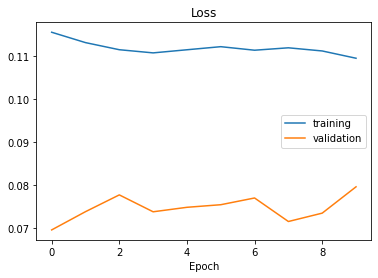

In [101]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [102]:
model.save('behavioural_cloning_model.h5')

In [103]:
#from google.colab import files
#files.download('behavioural_cloning_model.h5') 